In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing, datasets, svm, tree, ensemble, model_selection, metrics

In [3]:
## loading dataset
cancer = datasets.load_breast_cancer()
x = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
y = pd.DataFrame(data=cancer['target'], columns=['target'])

In [4]:
## Null values
x.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
## concatenating the x and y into single dataframe
df_original = pd.concat([x,y], axis=1)
df_original['target_name'] = np.where(df_original['target'] == 1,'Malignant', 'Benign')
df_original.target_name = df_original.target_name.astype('category')
df = df_original.copy()

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    float64 
 14  smoothness

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Benign


#### corelation of the target variable with the other variables and sorting them in ascending order

In [8]:
df.corr()['target'].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [9]:
corelation_matrix = df.corr()

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_name'],
      dtype='object')

In [11]:
def fetchCorelation(df):
    pairs = []
    
    for column1 in df.columns:
        for column2 in df.columns:
            if column1 != column2 and column1 != 'target' and column2 != 'target' and column1 != 'target_name' and column2 != 'target_name':
                if (corelation_matrix[column1][column2] >= 0.8) or (corelation_matrix[column1][column2] <= -0.8):
                    pairs.append((column1,column2,corelation_matrix[column1][column2], abs(corelation_matrix[column1][column2])))
    df1 = pd.DataFrame(pairs, columns=['A', 'B', 'R', 'ABS'])
    df2 = df1.sort_values(by=['ABS'],ascending=False)
    return df2
    

In [12]:
def removeAttributes(df,columns):
    for i in columns:
        del df[i]

## remove those attributes which has lower corelation by target variable


In [13]:
removeAttributes(df,['mean area', 'worst radius', 'mean radius','mean compactness', 'mean smoothness'])
df2 = fetchCorelation(df)
print("length",df2.shape[0])
df2.head()

length 44


,A,B,R,ABS
31,worst area,worst perimeter,0.977578,0.977578
26,worst perimeter,worst area,0.977578,0.977578
12,radius error,perimeter error,0.972794,0.972794
14,perimeter error,radius error,0.972794,0.972794
2,mean perimeter,worst perimeter,0.970387,0.970387


In [14]:
removeAttributes(df,['perimeter error', 'mean texture', 'worst area','worst concavity', 'worst perimeter'])
df2 = fetchCorelation(df)
print("length",df2.shape[0])
df2

length 18


,A,B,R,ABS
6,radius error,area error,0.951830,0.951830
7,area error,radius error,0.951830,0.951830
4,mean concave points,mean concavity,0.921391,0.921391
1,mean concavity,mean concave points,0.921391,0.921391
5,mean concave points,worst concave points,0.910155,0.910155
15,worst concave points,mean concave points,0.910155,0.910155
2,mean concavity,worst concave points,0.861323,0.861323
14,worst concave points,mean concavity,0.861323,0.861323
0,mean perimeter,mean concave points,0.850977,0.850977
3,mean concave points,mean perimeter,0.850977,0.850977


In [15]:
removeAttributes(df,['mean perimeter', 'area error', 'mean concavity','mean concave points', 'worst compactness'])
df2 = fetchCorelation(df)
print("length",df2.shape[0])
df2.head()

length 4


,A,B,R,ABS
1,compactness error,fractal dimension error,0.803269,0.803269
3,fractal dimension error,compactness error,0.803269,0.803269
0,compactness error,concavity error,0.801268,0.801268
2,concavity error,compactness error,0.801268,0.801268


In [16]:
removeAttributes(df,['concavity error', 'fractal dimension error'])
df2 = fetchCorelation(df)
print("length",df2.shape[0])
df2

length 0


,A,B,R,ABS


In [17]:
df

,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst texture,worst smoothness,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,17.33,0.16220,0.2654,0.4601,0.11890,0,Benign
1,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,23.41,0.12380,0.1860,0.2750,0.08902,0,Benign
2,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,25.53,0.14440,0.2430,0.3613,0.08758,0,Benign
3,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,26.50,0.20980,0.2575,0.6638,0.17300,0,Benign
4,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,16.67,0.13740,0.1625,0.2364,0.07678,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,26.40,0.14100,0.2216,0.2060,0.07115,0,Benign
565,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,38.25,0.11660,0.1628,0.2572,0.06637,0,Benign
566,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,34.12,0.11390,0.1418,0.2218,0.07820,0,Benign
567,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,39.42,0.16500,0.2650,0.4087,0.12400,0,Benign


<AxesSubplot:>

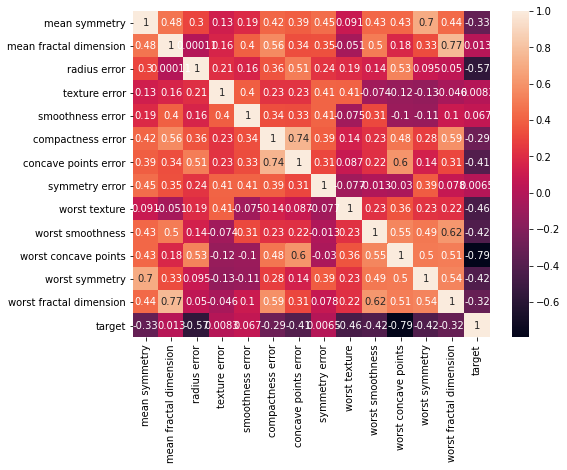

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.2)

In [20]:
classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[41 13]
 [ 0 60]]
0.8859649122807017


In [21]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[49  5]
 [ 1 59]]
0.9473684210526315


In [22]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[51  3]
 [ 5 55]]
0.9298245614035088


### After Feature Scaling


In [23]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
classifier = svm.SVC()
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[51  3]
 [ 0 60]]
0.9736842105263158


In [25]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[51  3]
 [ 1 59]]
0.9649122807017544


In [26]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[51  3]
 [ 4 56]]
0.9385964912280702


# As we can see that Accuracy is much higher in SVC

# Using PCA


In [27]:
from sklearn.decomposition import PCA

df_pca = df_original.copy()

In [28]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

pca = PCA(n_components=8)
pca.fit(x_scaled)
x_scaled_pca = pca.transform(x_scaled)

In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_scaled_pca,y,test_size = 0.2)

In [30]:
classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[35  4]
 [ 2 73]]
0.9473684210526315


In [31]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[ 8 31]
 [16 59]]
0.5877192982456141


In [32]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[15 24]
 [26 49]]
0.5614035087719298


In [33]:
pca.explained_variance_ratio_.sum()

0.9259825386346326

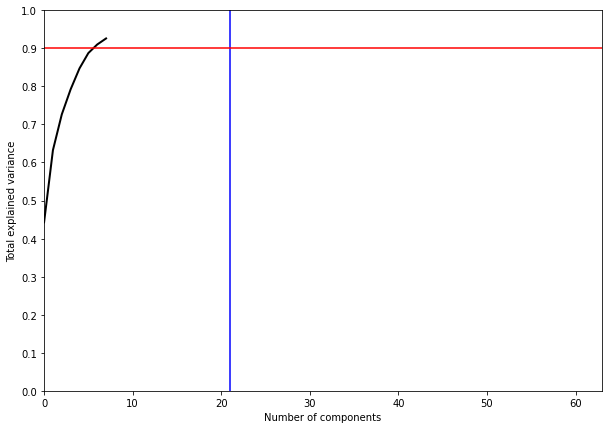

In [34]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

<AxesSubplot:xlabel='worst concave points', ylabel='mean radius'>

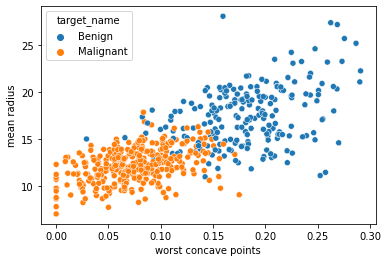

In [35]:
sns.scatterplot(df_original['worst concave points'], df_original['mean radius'], hue='target_name', data=df_original)